In [46]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [47]:
#freq Range
f=np.logspace(-3,1,100)
#lin, ilin and two params
R1=5000
Q=1e-3
R2=1000
alpha=0.95

#delta for two
delta=0.5

#lin circuit
c_lin=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit="TLMlinnew")
z_lin=c_lin.predict(f)

#ilin circuit
c_ilin=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit="TLMilinnew")
z_ilin=c_ilin.predict(f)

#two circuit
c_two=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta,alpha],circuit="TLMtwo")
z_two=c_two.predict(f)

c_all=[c_lin,c_ilin,c_two]
z_all=[z_lin,z_ilin,z_two]
profiles=["lin","ilin","two"]


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


auto
auto
auto


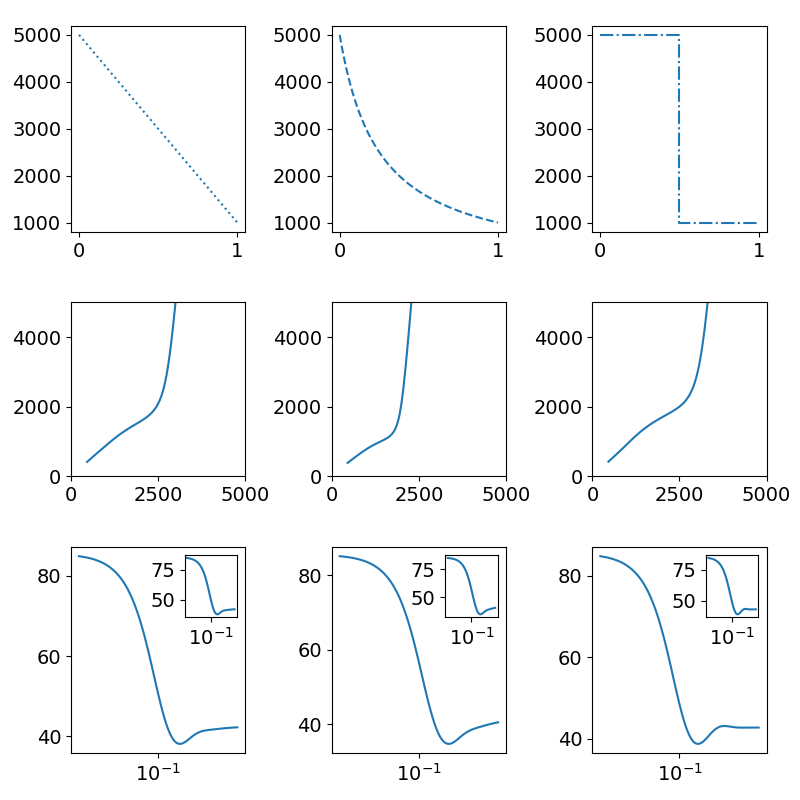

In [53]:
#set the fontsize, labelsizes and fonts etc. for the plots to be made below
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14


fig, axs=plt.subplots(3,3)
fig.set_size_inches(8,8)
fig.tight_layout()

for ax,prof,c in zip(axs[0],profiles,c_all):
    if prof=="lin":
        ax.plot([0,1],[c.initial_guess[0],c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=":")

    if prof=="ilin":
        xx=np.linspace(0,1)
        rx=1/((1/c.initial_guess[0])+(1/(c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1])-1/c.initial_guess[0])*xx)
        ax.plot(xx,rx,linestyle="--")

    if prof=="two":
        ax.plot([0,delta,delta,1],[c.initial_guess[0],c.initial_guess[0],c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1],c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle="-.")

for ax,z in zip(axs[1],z_all):
    ax.plot(np.real(z),-np.imag(z))
    ax.set_aspect("equal")
    ax.set_xlim(0,5000)
    ax.set_ylim(0,5000)

for ax,z in zip(axs[2],z_all):
    ax.plot(f,-np.angle(z,deg=True))
    theta_min=min(-np.angle(z,deg=True))
    gg=ax.get_aspect()
    ax.set_xscale("log")
    ax_inset=inset_axes(ax,width="30%",height="30%",loc="upper right")
    ax_inset.set_xscale("log")
    ax_inset.plot(f,-np.angle(z,deg=True))
    # ax_inset.plot()
    # ax.set_aspect("equal")
    # ax.set_xlim(0,10000)
    # ax.set_ylim(0,10000)
# 